## Problem Description
- Given 4 features i.e Sepal Width, Sepal Length, Petal Width and Petal Length need to find the category of flower
- Multicategory Problem, target values are : ['setosa' 'versicolor' 'virginica']

## Table of contents
1. Data Loading
2. Data Exploration
3. Converting Categorical to Numeric
4. Plotting relation between X and y
5. Train Test Split
3. Logistic Regression
  - Default(lbfgs) Solver
  - Liblinear Solver
  - Effect of Scaling
4. Support Vector Machine
  - Default(rbf) SVM 
  - Linear SVM
  - Poly SVM
  - Non Linear SVM
  - Evaluating Performance

### Data Loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
iris = datasets.load_iris()

### Data Exploration

In [3]:
print(type(iris.data))
iris.data.shape

<class 'numpy.ndarray'>


(150, 4)

In [4]:
#build a DataFrame for iris dataset from np ndarray
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

print("target variables are")
print(iris.target_names)

target variables are
['setosa' 'versicolor' 'virginica']


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Converting Categorical to Numeric

In [6]:
#since categorical values can't be used we map to numeric labels
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
# Let's see how many examples we have of each species
df["species"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

### Plotting relation between X and y

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


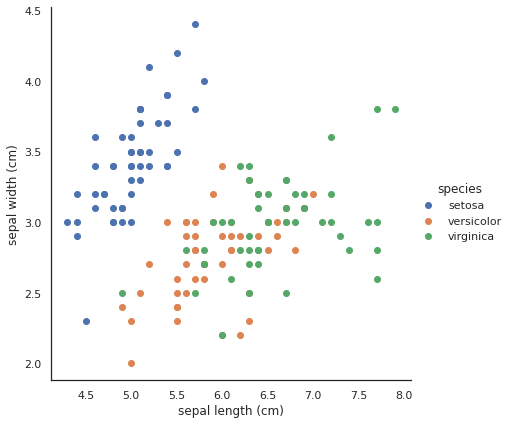

In [8]:
sns.FacetGrid(df, hue="species", size=6) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

In [0]:
#dropping the categorical value
df.drop(['species'], axis=1, inplace=True)

In [0]:
X = df.drop(['target'], axis=1)
y = df['target']

### Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
print(X_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
49                 5.0               3.3                1.4               0.2
135                7.7               3.0                6.1               2.3
115                6.4               3.2                5.3               2.3
123                6.3               2.7                4.9               1.8
2                  4.7               3.2                1.3               0.2


In [13]:
print(y_train.head())

49     0
135    2
115    2
123    2
2      0
Name: target, dtype: int64


### Logistic Regression


#### Default(lbfgs) Solver

In [14]:
# Train and predict
log_reg = LogisticRegression(max_iter=150)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make prediction
y_pred = log_reg.predict(X_test)

In [16]:
#accuracy
print("{0:.2f}".format(accuracy_score(y_test, y_pred)))

0.97


#### Liblinear Solver

In [17]:
# Train and predict using logistic regression
log_reg = LogisticRegression(max_iter=150, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make prediction
y_pred = log_reg.predict(X_test)

In [19]:
#accuracy
print("{0:.2f}".format(accuracy_score(y_test, y_pred)))

0.93


#### Effect of scaling

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(['target'], axis=1)
y = df['target']

In [21]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
#scaling X usig standard scaler
X = pd.DataFrame(scaler.fit_transform(X), columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
# Train and predict
log_reg = LogisticRegression(max_iter=150)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make prediction
y_pred = log_reg.predict(X_test)

In [26]:
#accuracy
print("{0:.2f}".format(accuracy_score(y_test, y_pred)))

0.93


### Support Vector Machine

#### Default(rbf) SVM

In [27]:
model_svm_def = svm.SVC()
model_svm_def.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm_def = model_svm_def.predict(X_test)

In [29]:
print(confusion_matrix(y_test, y_pred_svm_def))
print(accuracy_score(y_test, y_pred_svm_def))

[[12  0  0]
 [ 0  4  1]
 [ 0  1 12]]
0.9333333333333333


#### Linear SVM

In [30]:
model_svm_l = svm.SVC(kernel='linear')
model_svm_l.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm_l = model_svm_l.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred_svm_l))
print(accuracy_score(y_test, y_pred_svm_l))

[[12  0  0]
 [ 0  4  1]
 [ 0  0 13]]
0.9666666666666667


#### Poly SVM

In [33]:
model_svm_poly = svm.SVC(kernel='poly')
model_svm_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm_poly = model_svm_poly.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred_svm_poly))
print(accuracy_score(y_test, y_pred_svm_poly))

[[12  0  0]
 [ 0  5  0]
 [ 0  2 11]]
0.9333333333333333


#### Non Linear SVM

In [36]:
model_svm_nl = svm.NuSVC(gamma='auto')
model_svm_nl.fit(X_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [0]:
y_pred_svm_nl = model_svm_nl.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred_svm_nl))
print(accuracy_score(y_test, y_pred_svm_nl))

[[12  0  0]
 [ 0  4  1]
 [ 0  1 12]]
0.9333333333333333
